<font style = 'color:green; font-size:30px; font-weight: bold'>Dealing with data of many dimensions</font>

<br>
<font color= 'grey' style='font-size: 30px'>1.2 Importing libraries and Reading data</font>
<hr style = 'border: 2px solid grey'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv"

data = pd.read_csv(uri)
data.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
data.shape

(569, 35)

<font color= 'grey' style='font-size: 30px'>1.3 Manipulating data</font>
<hr style = 'border: 2px solid grey'>

## missing data

In [4]:
data.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [5]:
data_v1 = data.drop(['exame_33', 'id'], axis = 1)

<br>
<font color= 'grey' style='font-size: 30px'>1.3 Building model without reduce dimensions</font>
<hr style = 'border: 2px solid grey'>

## Features and classification variable

In [6]:
X = data_v1.drop('diagnostico', axis = 1)
y = data_v1['diagnostico']

## Train and Test separation

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(123143)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

## Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print(f'Accuracy : {accuracy * 100:.2f}%')

Accuracy : 92.40%


## Dummy Classifier

In [9]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(X_train, y_train)

dummy_accuracy = dummy_model.score(X_test, y_test)

print(f'Dummy Accuracy : {dummy_accuracy * 100:.2f}%')

Dummy Accuracy : 66.67%


<br>
<font color= 'grey' style='font-size: 30px'>1.4 Visualization </font>
<hr style = 'border: 2px solid grey'>

## Standarding data

In [10]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
standardizer.fit(X)
X_values = standardizer.transform(X)

X_values = pd.DataFrame(data = X_values, columns = X.keys())

## Violin Graphic

In [11]:
def violin_graphic(X_values, start, end):
    """
    Create a violin plot with X values, you can building how many violin plot wanted and choose the start and end data. 

    Parameters
    ----------
    X_values : DataFrame pandas
        Features of the classification
    start : int
        Where start the visualization data
    end : int
        Where end the visualization data
    """
    
    data_v2 = pd.concat([y, X_values.iloc[:, start:end]], axis= 1)
    
    plot_data = pd.melt(
        data_v2, 
        id_vars = 'diagnostico', 
        var_name='exames', 
        value_name='valores'
    )
    
    ax = sns.violinplot(
        x = 'exames', 
        y = 'valores', 
        hue = 'diagnostico', 
        data = plot_data,
        split = True
    )

    ax.figure.set_size_inches(10, 5)
    ax.set_title('Differences between the Diagnostico', fontsize = 20)
    ax.set_xlabel('Exames', fontsize = 16)
    ax.set_ylabel('Valores', fontsize = 16)

    # Using plt because is more easy change ticks
    plt.xticks(rotation = 75);

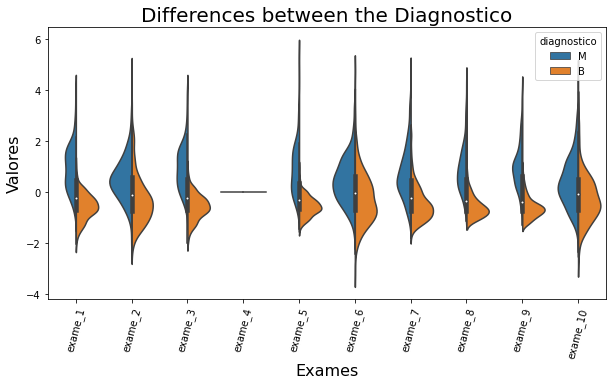

In [12]:
violin_graphic(X_values, 0, 10)

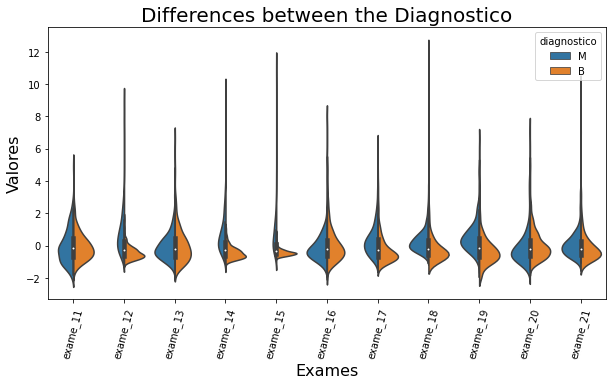

In [13]:
violin_graphic(X_values, 10, 21)

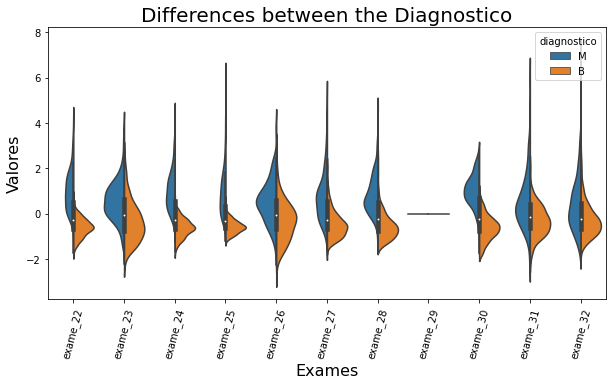

In [14]:
violin_graphic(X_values, 21, 32)

> Looking the graphics, we can drop exame 4 and 29 because all data are eguals

## Dropping

In [15]:
X_values_2 = X_values.drop(['exame_4', 'exame_29'], axis = 1)

<br>
<font color= 'grey' style='font-size: 30px'>1.5 New classification </font>
<hr style = 'border: 2px solid grey'>

In [16]:
def classifier(X_values):
    np.random.seed(1234)
    X_train, X_test, y_train, y_test = train_test_split(X_values, y , test_size = 0.3)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)

    print(f'Accuracy : {accuracy * 100:.2f}%')

In [17]:
classifier(X_values_2)

Accuracy : 92.98%
